In [7]:
import pandas as pd
import xgboost as xgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [2]:
df = pd.read_csv('video_quality_prediction_dataset.csv')

In [3]:


le = LabelEncoder()
df['Predicted_Video_Quality'] = le.fit_transform(df['Predicted_Video_Quality'])

# Save the label encoder
joblib.dump(le, 'label_encoder_quality.pkl')
print("Label encoder saved as 'label_encoder_quality.pkl'")


Label encoder saved as 'label_encoder_quality.pkl'


In [4]:
X = df.drop(columns=['Predicted_Video_Quality'])
y = df['Predicted_Video_Quality']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': xgb.XGBClassifier(eval_metric='mlogloss')
}


C:\Users\damindu pahasara\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.8290


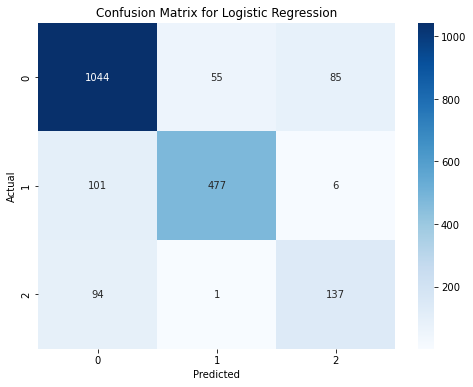

Decision Tree Accuracy: 0.9995


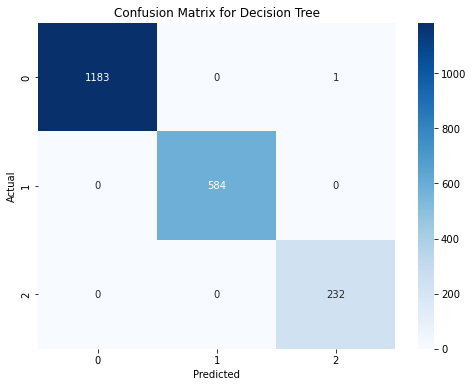

Random Forest Accuracy: 0.9995


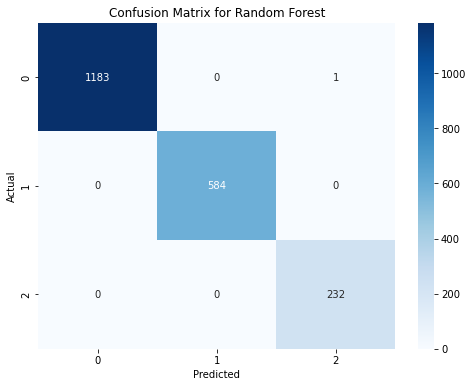

XGBoost Accuracy: 0.9985


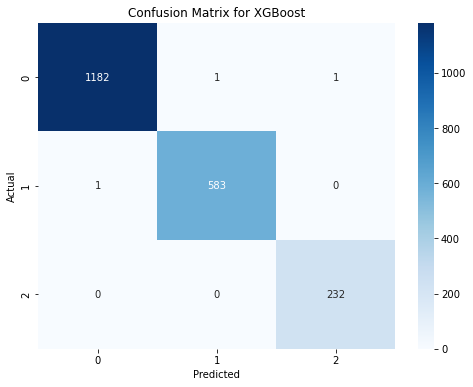

The best model (Decision Tree) has been saved as 'best_model.pkl' with accuracy: 0.9995


In [8]:

best_model_name = None
best_model = None
best_accuracy = 0


for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = model_name
        best_model = model


joblib.dump(best_model, 'best_model.pkl')
print(f"The best model ({best_model_name}) has been saved as 'best_model.pkl' with accuracy: {best_accuracy:.4f}")
